# Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = model.fit_transform(X_train_scaled)

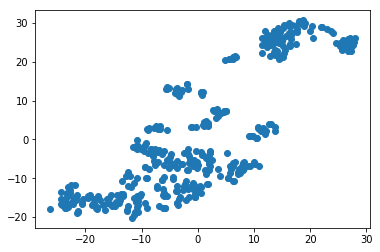

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# Задание 2

In [9]:
from sklearn.cluster import KMeans
model_km = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [10]:
boston_labels = model_km.fit_predict(X_train_tsne)
print(boston_labels)

[1 2 0 1 2 0 2 0 1 1 2 2 2 1 2 2 2 0 0 0 1 2 0 2 0 2 2 2 2 0 2 2 2 1 2 0 0
 2 2 0 0 2 1 0 2 1 2 2 1 1 0 2 0 2 1 1 0 1 2 0 2 2 2 2 2 1 2 0 2 2 2 2 1 2
 2 2 0 0 2 1 1 1 2 2 1 2 1 0 1 2 2 1 1 0 0 2 1 2 0 2 2 0 0 0 2 2 0 2 0 2 1
 0 2 0 0 1 1 1 2 2 2 1 1 2 0 2 1 0 0 1 0 2 2 2 0 1 2 0 2 2 2 1 2 2 0 1 2 0
 2 2 2 1 0 0 0 1 2 1 2 1 0 2 2 2 2 0 0 2 0 2 2 0 0 1 0 0 1 1 0 2 0 2 1 2 2
 1 0 0 1 1 1 0 0 1 1 2 2 2 0 2 1 1 2 2 2 2 0 2 2 2 2 0 2 1 2 2 0 1 2 1 1 2
 1 0 2 0 0 2 0 2 1 2 0 2 2 2 2 1 0 2 2 0 0 1 1 2 0 1 1 2 2 0 1 0 0 1 2 2 1
 2 1 2 2 0 2 0 2 2 2 2 0 1 2 1 2 2 0 2 1 2 0 2 2 1 0 0 1 0 0 2 2 0 1 1 1 2
 0 1 2 2 2 2 2 0 1 0 2 1 0 0 2 0 2 0 2 1 0 2 2 2 0 1 2 1 2 2 1 0 2 2 1 2 1
 1 2 2 1 0 0 2 0 2 2 2 1 2 2 0 2 2 0 1 2 0 0 1 0 1 2 1 0 2 1 0 2 0 2 0 2 0
 2 2 1 2 2 1 0 1 0 1 0 2 2 2 2 2 1 2 1 2 1 0 2 1 2 2 2 0 0 2 0 0 1 2]


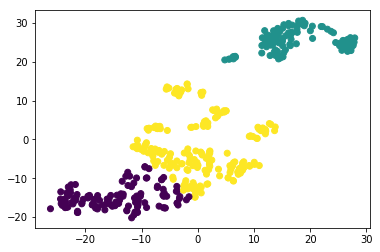

In [11]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=boston_labels)
plt.show()

In [12]:
for i in range(3):
    print(i, y_train[boston_labels == i].mean())


0 25.99304347826087
1 16.277227722772277
2 24.343617021276597


In [13]:
for i in range(3):
    print(i, X_train.loc[boston_labels == i, 'CRIM'].mean())

0 0.08557826086956521
1 13.17982178217822
2 0.6227811170212766


# Задание 3

In [14]:
model_km.fit(X_train_scaled, boston_labels)
boston_labels_test = model_km.predict(X_test_scaled)
print(boston_labels_test)

[2 0 1 2 1 2 2 1 1 2 2 2 1 2 2 1 2 1 0 1 0 0 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2
 2 2 2 2 2 0 2 2 1 2 2 1 2 2 0 2 2 2 1 1 0 2 2 0 0 2 2 0 2 1 0 0 1 2 1 1 0
 2 1 2 0 1 1 0 1 0 1 2 2 1 2 2 2 2 1 2 2 1 2 1 1 1 1 2 2]


In [15]:
for i in range(3):
    print(i, y_test[boston_labels_test == i].mean())

0 31.35
1 16.43714285714286
2 21.860784313725492


In [16]:
for i in range(3):
    print(i, X_test.loc[boston_labels_test == i, 'CRIM'].mean())

0 0.062060000000000004
1 10.165531142857143
2 0.26607882352941176
